In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, SpatialDropout3D
from tensorflow.keras.utils import to_categorical
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
# from PIL import Image
import PIL
from random import shuffle

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from shutil import copyfile, move

from datetime import datetime
from tensorflow import keras
from datetime import datetime
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from numba import cuda
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

In [2]:
gpus = tensorflow.config.list_physical_devices('GPU')
tensorflow.config.experimental.set_visible_devices(gpus[0], 'GPU')

In [3]:
batch_size = 32
learning_rate = 0.001
no_classes = 11
verbosity = 1

epochs = 200
patience = 50
sampling_rate = 100
NOW = datetime.now().strftime("%Y%m%d-%H%M%S")
seq_frame_len = 100
# data_dir = pathlib.Path(data_dir)

verbosity = 1

In [4]:
# c = []
def array_to_color(array, cmap="Oranges"):
    cmap = plt.cm.viridis
    s_m = plt.cm.ScalarMappable(cmap=cmap)
    image = s_m.to_rgba(array, alpha=None, bytes=False, norm=True)
    
    return image[:,:,:-1]

def rgb_data_transform(data):
    data_t = []
    for i in range(data.shape[0]):
        data_t.append(array_to_color(data[i]).reshape(78, 32, 32, 4))
    return np.asarray(data_t, dtype=np.float32)

def getPic(img_path):
    return np.array(Image.open(img_path).convert('RGB'))
def getImgNp(uri):
    img = np.array(PIL.Image.open(str(uri)));
    return img
#     print(img.shape)
def getImages(label):
    dataArray = []
    for i in [label]: #, 3, 6, 9, 10]:
        dirs = [ x for x in glob.glob( str(i) + "/*")] #os.path.basename(x)
        for folName in dirs:
            tempImages = []
            images = [x for x in glob.glob('./' + folName + '/*')]
#             if(len(images) > 78):
            for i, img in enumerate(sorted(images)):
#                 if(i < 78): # older
                if(i < 80):
                    img = getImgNp(img)
                    img = array_to_color(img)
                    tempImages.append(img)
            tempImages = np.array(tempImages)
            dataArray.append(tempImages)
    return dataArray
def getModel():
#     sample_shape = (78, 32, 32, 3) # older shape
    sample_shape = (80, 32, 32, 3)
    model = Sequential()
    model.add(Conv3D(32, kernel_size=(2, 2, 2), activation='LeakyReLU', kernel_initializer='he_uniform', input_shape=sample_shape))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(SpatialDropout3D(0.25))
    model.add(Conv3D(64, kernel_size=(2, 2, 2), activation='LeakyReLU', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(SpatialDropout3D(0.25))
    model.add(Conv3D(128, kernel_size=(2, 2, 2), activation='LeakyReLU', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(SpatialDropout3D(0.25))
    model.add(Conv3D(256, kernel_size=(2, 2, 2), activation='LeakyReLU', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(SpatialDropout3D(0.25))
    model.add(Flatten())
    model.add(Dense(2048, activation='LeakyReLU', kernel_initializer='he_uniform'))
    model.add(Dense(512, activation='LeakyReLU', kernel_initializer='he_uniform'))
    model.add(Dense(no_classes, activation='softmax'))
    return model

l0
l1
l2
l3
l4
l5
l6
l7
l8
l9
l10


<ipython-input-5-aac9ddbd54df>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trainlx = np.array(train[0] + train[1] + train[2] + train[3] + train[4] + train[5] + train[6] + train[7] + train[8] + train[9]+ train[10])#.reshape(163, 78, 32, 32, 3)
<ipython-input-5-aac9ddbd54df>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  testx = np.array(test[0] + test[1] + test[2] + test[3] + test[4] + test[5] + test[6] + test[7] + test[8] + test[9]+ test[10])


(4772, 80, 32, 32, 3)
(1857, 80, 32, 32, 3)
(2849, 80, 32, 32, 3)
Epoch 1/200
150/150 [==============================] - 10s 56ms/step - loss: 3.4640 - accuracy: 0.1014 - val_loss: 2.2318 - val_accuracy: 0.1820
Epoch 2/200
150/150 [==============================] - 7s 48ms/step - loss: 2.2544 - accuracy: 0.1771 - val_loss: 2.0636 - val_accuracy: 0.2439
Epoch 3/200
150/150 [==============================] - 7s 47ms/step - loss: 2.1383 - accuracy: 0.2177 - val_loss: 1.9205 - val_accuracy: 0.2946
Epoch 4/200
150/150 [==============================] - 7s 47ms/step - loss: 2.0183 - accuracy: 0.2683 - val_loss: 1.9129 - val_accuracy: 0.2838
Epoch 5/200
150/150 [==============================] - 7s 48ms/step - loss: 1.9658 - accuracy: 0.2834 - val_loss: 1.7836 - val_accuracy: 0.3371
Epoch 6/200
150/150 [==============================] - 7s 48ms/step - loss: 1.8584 - accuracy: 0.3248 - val_loss: 1.8003 - val_accuracy: 0.3301
Epoch 7/200
150/150 [==============================] - 7s 47ms/step -

150/150 [==============================] - 7s 50ms/step - loss: 0.3134 - accuracy: 0.8991 - val_loss: 0.7899 - val_accuracy: 0.7841
Epoch 58/200
150/150 [==============================] - 8s 51ms/step - loss: 0.2503 - accuracy: 0.9141 - val_loss: 0.8774 - val_accuracy: 0.7846
Epoch 59/200
150/150 [==============================] - 7s 47ms/step - loss: 0.3067 - accuracy: 0.8941 - val_loss: 0.9065 - val_accuracy: 0.7695
Epoch 60/200
150/150 [==============================] - 7s 48ms/step - loss: 0.3630 - accuracy: 0.8908 - val_loss: 0.8713 - val_accuracy: 0.7760
Epoch 61/200
150/150 [==============================] - 7s 49ms/step - loss: 0.3200 - accuracy: 0.9004 - val_loss: 0.8811 - val_accuracy: 0.7857
Epoch 62/200
150/150 [==============================] - 7s 48ms/step - loss: 0.2766 - accuracy: 0.9110 - val_loss: 0.9194 - val_accuracy: 0.7819
Epoch 63/200
150/150 [==============================] - 7s 49ms/step - loss: 0.2802 - accuracy: 0.9043 - val_loss: 0.9967 - val_accuracy: 0.763

/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


-------------------------------------------------------
l0
l1
l2
l3
l4
l5
l6
l7
l8
l9
l10


<ipython-input-5-aac9ddbd54df>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trainlx = np.array(train[0] + train[1] + train[2] + train[3] + train[4] + train[5] + train[6] + train[7] + train[8] + train[9]+ train[10])#.reshape(163, 78, 32, 32, 3)
<ipython-input-5-aac9ddbd54df>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  testx = np.array(test[0] + test[1] + test[2] + test[3] + test[4] + test[5] + test[6] + test[7] + test[8] + test[9]+ test[10])


(4772, 80, 32, 32, 3)
(1857, 80, 32, 32, 3)
(2849, 80, 32, 32, 3)
Epoch 1/200
150/150 [==============================] - 8s 53ms/step - loss: 3.8371 - accuracy: 0.0982 - val_loss: 2.3114 - val_accuracy: 0.1804
Epoch 2/200
150/150 [==============================] - 7s 48ms/step - loss: 2.3111 - accuracy: 0.1427 - val_loss: 2.1442 - val_accuracy: 0.2224
Epoch 3/200
150/150 [==============================] - 7s 48ms/step - loss: 2.1933 - accuracy: 0.1932 - val_loss: 2.0005 - val_accuracy: 0.2628
Epoch 4/200
150/150 [==============================] - 7s 48ms/step - loss: 2.0437 - accuracy: 0.2551 - val_loss: 1.9425 - val_accuracy: 0.2994
Epoch 5/200
150/150 [==============================] - 7s 48ms/step - loss: 1.9748 - accuracy: 0.2763 - val_loss: 1.8691 - val_accuracy: 0.3064
Epoch 6/200
150/150 [==============================] - 7s 49ms/step - loss: 1.9019 - accuracy: 0.3088 - val_loss: 1.8065 - val_accuracy: 0.3376
Epoch 7/200
150/150 [==============================] - 7s 48ms/step - 

150/150 [==============================] - 7s 49ms/step - loss: 0.3160 - accuracy: 0.8920 - val_loss: 0.8691 - val_accuracy: 0.7905
Epoch 58/200
150/150 [==============================] - 7s 49ms/step - loss: 0.2950 - accuracy: 0.9014 - val_loss: 0.8311 - val_accuracy: 0.7981
Epoch 59/200
150/150 [==============================] - 7s 48ms/step - loss: 0.2125 - accuracy: 0.9270 - val_loss: 0.9124 - val_accuracy: 0.7970
Epoch 60/200
150/150 [==============================] - 8s 51ms/step - loss: 0.2794 - accuracy: 0.9055 - val_loss: 0.8908 - val_accuracy: 0.7932
Epoch 61/200
150/150 [==============================] - 8s 50ms/step - loss: 0.2548 - accuracy: 0.9148 - val_loss: 0.7720 - val_accuracy: 0.7959
Epoch 62/200
150/150 [==============================] - 7s 50ms/step - loss: 0.2283 - accuracy: 0.9221 - val_loss: 0.8942 - val_accuracy: 0.7900
Epoch 63/200
150/150 [==============================] - 7s 48ms/step - loss: 0.3447 - accuracy: 0.8859 - val_loss: 0.8391 - val_accuracy: 0.788

/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


-------------------------------------------------------
l0
l1
l2
l3
l4
l5
l6
l7
l8
l9
l10


<ipython-input-5-aac9ddbd54df>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trainlx = np.array(train[0] + train[1] + train[2] + train[3] + train[4] + train[5] + train[6] + train[7] + train[8] + train[9]+ train[10])#.reshape(163, 78, 32, 32, 3)
<ipython-input-5-aac9ddbd54df>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  testx = np.array(test[0] + test[1] + test[2] + test[3] + test[4] + test[5] + test[6] + test[7] + test[8] + test[9]+ test[10])


(4772, 80, 32, 32, 3)
(1857, 80, 32, 32, 3)
(2849, 80, 32, 32, 3)
Epoch 1/200
150/150 [==============================] - 9s 54ms/step - loss: 3.6882 - accuracy: 0.1000 - val_loss: 2.2390 - val_accuracy: 0.1826
Epoch 2/200
150/150 [==============================] - 7s 48ms/step - loss: 2.2674 - accuracy: 0.1672 - val_loss: 2.0994 - val_accuracy: 0.2095
Epoch 3/200
150/150 [==============================] - 7s 49ms/step - loss: 2.1607 - accuracy: 0.2038 - val_loss: 2.0445 - val_accuracy: 0.2418
Epoch 4/200
150/150 [==============================] - 7s 50ms/step - loss: 2.0786 - accuracy: 0.2358 - val_loss: 1.9250 - val_accuracy: 0.3053
Epoch 5/200
150/150 [==============================] - 7s 49ms/step - loss: 2.0079 - accuracy: 0.2642 - val_loss: 1.8419 - val_accuracy: 0.3312
Epoch 6/200
150/150 [==============================] - 7s 50ms/step - loss: 1.9371 - accuracy: 0.2862 - val_loss: 1.8076 - val_accuracy: 0.3403
Epoch 7/200
150/150 [==============================] - 7s 49ms/step - 

150/150 [==============================] - 8s 51ms/step - loss: 0.3105 - accuracy: 0.8988 - val_loss: 0.8259 - val_accuracy: 0.8002
Epoch 58/200
150/150 [==============================] - 7s 49ms/step - loss: 0.3184 - accuracy: 0.8880 - val_loss: 0.7036 - val_accuracy: 0.8051
Epoch 59/200
150/150 [==============================] - 7s 50ms/step - loss: 0.2612 - accuracy: 0.9144 - val_loss: 0.8017 - val_accuracy: 0.7954
Epoch 60/200
150/150 [==============================] - 8s 50ms/step - loss: 0.2557 - accuracy: 0.9139 - val_loss: 0.9983 - val_accuracy: 0.7760
Epoch 61/200
150/150 [==============================] - 7s 50ms/step - loss: 0.3238 - accuracy: 0.8911 - val_loss: 0.8228 - val_accuracy: 0.7975
Epoch 62/200
150/150 [==============================] - 7s 49ms/step - loss: 0.2550 - accuracy: 0.9148 - val_loss: 0.7958 - val_accuracy: 0.8099
Epoch 63/200
150/150 [==============================] - 7s 49ms/step - loss: 0.2845 - accuracy: 0.9111 - val_loss: 0.9334 - val_accuracy: 0.790

/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


-------------------------------------------------------


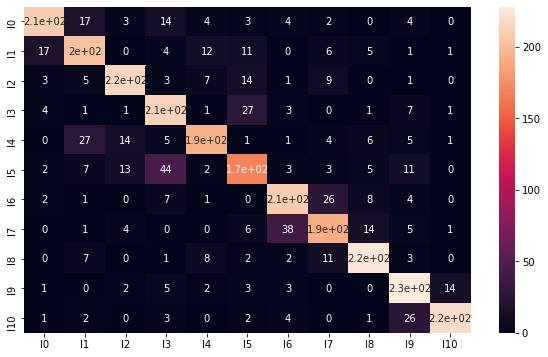

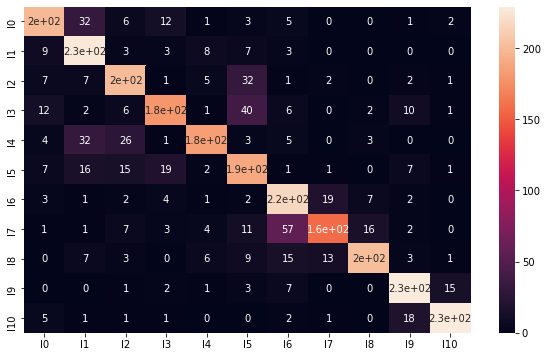

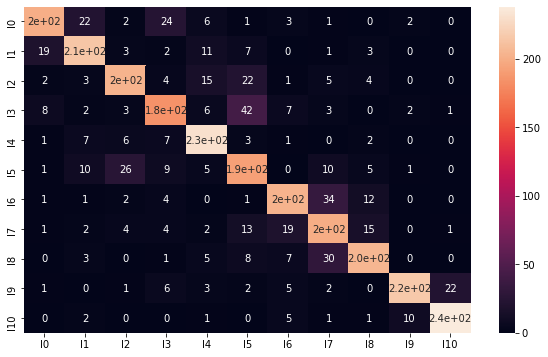

In [5]:
# iterable = 1
for iterable in range(3):
# for imgDir in ['RD_16']: #, 'RD_16', 'RD_32']:
    imgDir = 'RD_16'
    train = []
    test = []
    trainL = []
    testL = []
    label = 0
    for i in range(11): #[0, 3, 6, 9, 10]:
        print('l' + str(i))
        l0 = getImages( imgDir + '/' +str(i))
        shuffle(l0)
    #     data.append(imgs)
        trainl0x = l0[:int(len(l0)*.7)]
        testl0x = l0[int(len(l0)*.7):]
        train.append(trainl0x)
        test.append(testl0x)

        trainl0y = np.full(len(trainl0x), label) # label 0
        testl0y = np.full(len(testl0x), label)
        trainL.append(trainl0y)
        testL.append(testl0y)
        label = label + 1
    trainlx = np.array(train[0] + train[1] + train[2] + train[3] + train[4] + train[5] + train[6] + train[7] + train[8] + train[9]+ train[10])#.reshape(163, 78, 32, 32, 3)
    testx = np.array(test[0] + test[1] + test[2] + test[3] + test[4] + test[5] + test[6] + test[7] + test[8] + test[9]+ test[10])

    trainly = np.concatenate((trainL[0], trainL[1], trainL[2], trainL[3], trainL[4], trainL[5], trainL[6], trainL[7], trainL[8], trainL[9], trainL[10] ))
    testy = np.concatenate((testL[0], testL[1], testL[2], testL[3], testL[4], testL[5], testL[6], testL[7], testL[8], testL[9], testL[10] ))

    targets_train = to_categorical(trainly).astype(np.int32)
    targets_test = to_categorical(testy).astype(np.int32)
    
    trainlx = tensorflow.keras.preprocessing.sequence.pad_sequences(trainlx, padding="post", dtype="float32")
    testx = tensorflow.keras.preprocessing.sequence.pad_sequences(testx, padding="post", dtype="float32")

    X_train, X_val, y_train, y_val = train_test_split(trainlx, targets_train, test_size=0.28, random_state=42)

    print(X_train.shape)
    #     print(y_train.shape)
    print(X_val.shape)
    #     print(y_val.shape)
    print(testx.shape)

    model =  getModel()
    NOW = datetime.now().strftime("%Y%m%d-%H%M%S")
    model_id = '{}_c{}b{}e{}p{}l{}s{}_{}'.format('sq', no_classes, batch_size, epochs, patience, seq_frame_len, sampling_rate, NOW)
    visualizer = tensorflow.keras.callbacks.TensorBoard(log_dir='./conv3d_' + imgDir + '/tfevents_{}_{}'.format(model_id, iterable))
    earlystops = tensorflow.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True, verbose=0)


    # Compile the model
    model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
                  optimizer=tensorflow.keras.optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])

    # Fit data to model
    history = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_val, y_val),
                callbacks=[visualizer, earlystops])
    model.save('./conv3d_' + imgDir + '/{}'.format(model_id + '.h5'))

    predict = model.predict(testx)

    print('-------------------' + str(iterable) + ' ' + imgDir + '----------------------')
    results = model.evaluate(X_train, y_train, batch_size=batch_size)
    print("train loss: {},\ntrain acc: {}".format(results[0], results[1]))
    results = model.evaluate(X_val, y_val, batch_size=batch_size)
    print("val loss: {},\nval acc: {}".format(results[0], results[1]))
    results = model.evaluate(testx, targets_test, batch_size=batch_size)
    print("test loss: {},\ntest acc: {}".format(results[0], results[1]))
    try:
        y_test_true = to_categorical(targets_test.argmax(1)).astype(np.int32)
        y_test_pred = to_categorical(predict.argmax(1)).astype(np.int32)
        auc = 100*roc_auc_score(y_test_true, y_test_pred, average='weighted', multi_class='ovo')
        acc = 100*accuracy_score(y_test_true, y_test_pred,)
        prec, rec, f1, _ = precision_recall_fscore_support(y_test_true, y_test_pred, average='weighted')
        print('Test accuracy: {:.5f}, AUC {:.5f}, Precision {:.5f}, Recall {:.5f}, F1 {:.5f}, \n'.format( acc, auc, prec, rec, f1))
        # print('Train accuracy: {:.2f}%'.format(100*accuracy))

        labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        cm = confusion_matrix(targets_test.argmax(axis=1), predict.argmax(1), labels)
        print(cm)

        index = ['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10']  
        columns = ['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10'] 
        cm_df = pd.DataFrame(cm,columns,index)                      
        plt.figure(figsize=(10,6))  
        sns.heatmap(cm_df, annot=True)
    except:
        print('error occured on roc_auc')
    print('-------------------------------------------------------')